In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix ,precision_score,recall_score,f1_score

In [ ]:
df = pd.read_csv('/content/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
# To check null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
# Alternative to check null values
df.isnull().sum()



Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [ ]:
# Checking Duplicate values
df.duplicated().sum()

0

In [ ]:
# only Hazardous column is categorical so one-Hot encoding it
hzrds_lbl = pd.get_dummies(df['Hazardous'])
hzrds_lbl

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


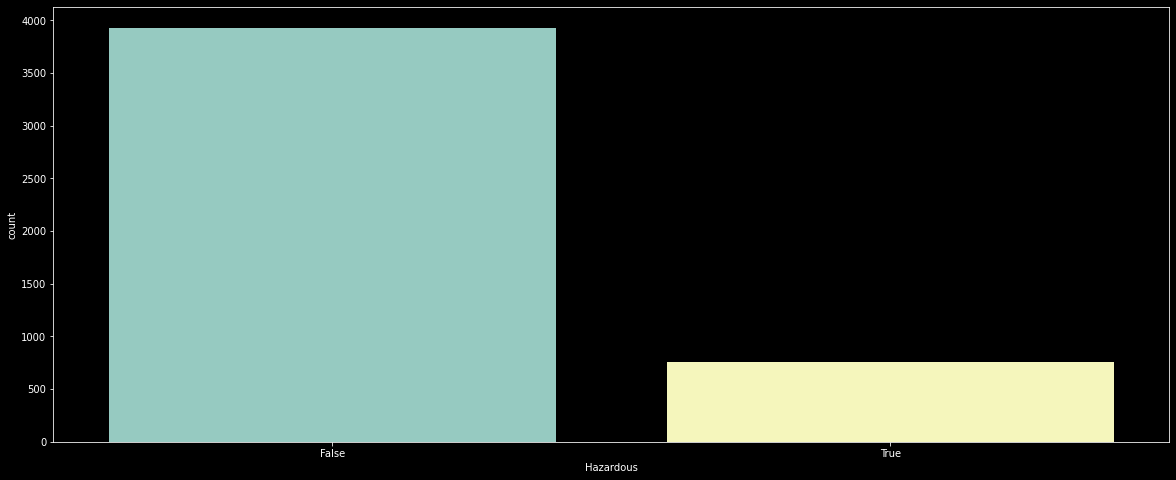

In [ ]:
# Unbalanced data
sns.countplot(df['Hazardous'])

In [ ]:
df = pd.concat([df, hzrds_lbl], axis = 1)

df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,0,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,1,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,0,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,1,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,0,1


In [ ]:
df = df.drop(['Hazardous'], axis = 1)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,False,True
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,0,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,1,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,0,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,1,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,0,1


In [ ]:
df[True].value_counts()

0    3932
1     755
Name: True, dtype: int64

In [ ]:
df[False].value_counts()

1    3932
0     755
dtype: int64

In [ ]:
# Since both are same we need only one for calculation
df.drop([False], axis = 1, inplace = True)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,True
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


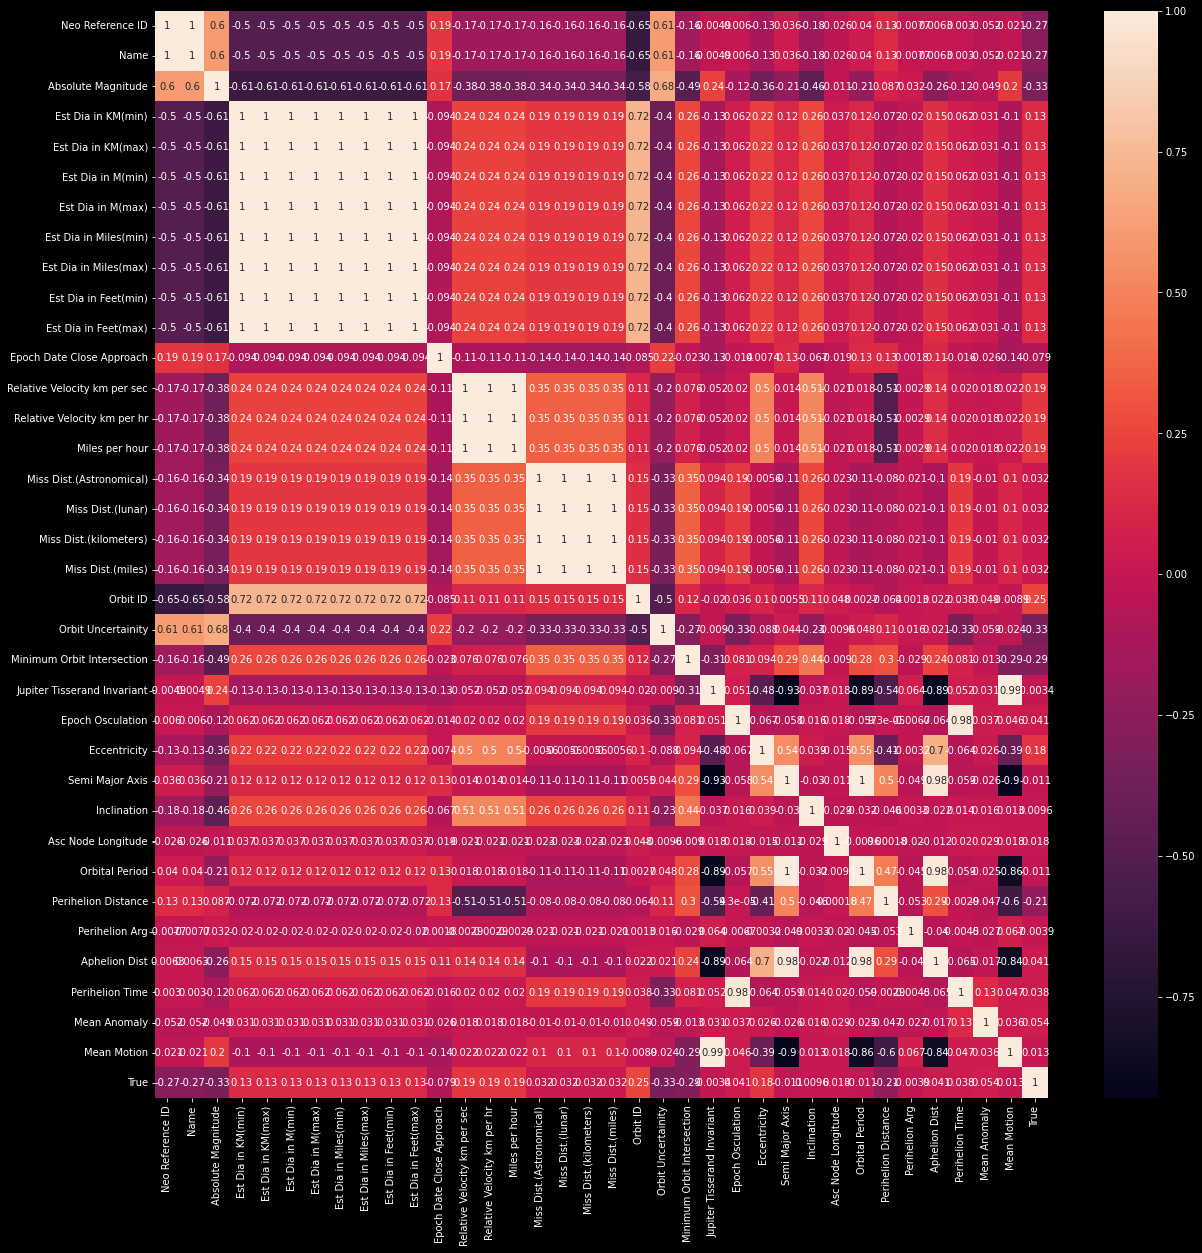

In [ ]:
# Plotting HeatMap
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [ ]:
corr_matrix = df.corr().abs()
print(corr_matrix)

                              Neo Reference ID      Name  Absolute Magnitude  \
Neo Reference ID                      1.000000  1.000000            0.602381   
Name                                  1.000000  1.000000            0.602381   
Absolute Magnitude                    0.602381  0.602381            1.000000   
Est Dia in KM(min)                    0.499821  0.499821            0.613482   
Est Dia in KM(max)                    0.499821  0.499821            0.613482   
Est Dia in M(min)                     0.499821  0.499821            0.613482   
Est Dia in M(max)                     0.499821  0.499821            0.613482   
Est Dia in Miles(min)                 0.499821  0.499821            0.613482   
Est Dia in Miles(max)                 0.499821  0.499821            0.613482   
Est Dia in Feet(min)                  0.499821  0.499821            0.613482   
Est Dia in Feet(max)                  0.499821  0.499821            0.613482   
Epoch Date Close Approach             0.

In [ ]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                              Neo Reference ID  Name  Absolute Magnitude  \
Neo Reference ID                           NaN   1.0            0.602381   
Name                                       NaN   NaN            0.602381   
Absolute Magnitude                         NaN   NaN                 NaN   
Est Dia in KM(min)                         NaN   NaN                 NaN   
Est Dia in KM(max)                         NaN   NaN                 NaN   
Est Dia in M(min)                          NaN   NaN                 NaN   
Est Dia in M(max)                          NaN   NaN                 NaN   
Est Dia in Miles(min)                      NaN   NaN                 NaN   
Est Dia in Miles(max)                      NaN   NaN                 NaN   
Est Dia in Feet(min)                       NaN   NaN                 NaN   
Est Dia in Feet(max)                       NaN   NaN                 NaN   
Epoch Date Close Approach                  NaN   NaN                 NaN   
Relative Vel

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['Name', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion']


Dropping Similar features

In [ ]:
df2 = df.drop(['Name', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec', 'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(Astronomical)', 'Miss Dist.(miles)',  ], axis=1)
df2.head()

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,Orbit ID,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,True
0,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,22017.003799,62753692.0,Earth,17,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,65210.346095,57298148.0,Earth,21,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,27326.560182,7622911.5,Earth,22,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,40225.948191,42683616.0,Earth,7,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,35426.991794,61010824.0,Earth,25,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


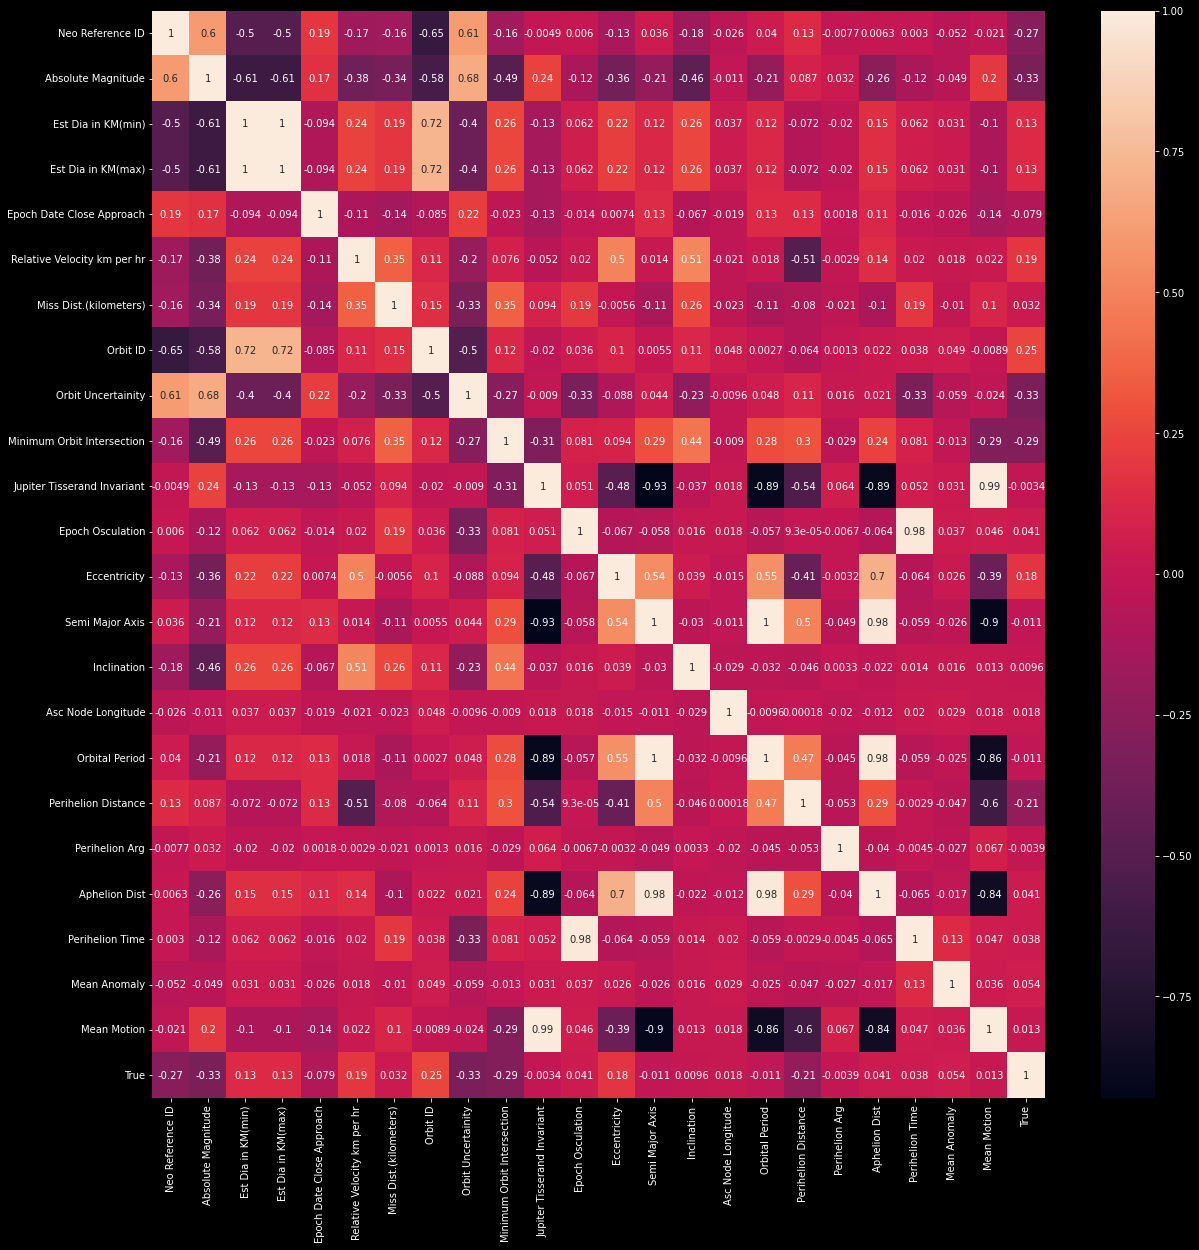

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df2.corr(),annot = True)

In [ ]:
df2['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [ ]:
df2['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

Dropping irrelevant features such as Date and ID

In [ ]:
df2 = df2.drop(['Neo Reference ID','Epoch Date Close Approach','Orbit ID','Orbiting Body', 'Equinox', 'Close Approach Date', 'Orbit Determination Date'], axis = 1)
df2.rename(columns={True: 'Hazardous'}, inplace=True)

In [ ]:
df2

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,22017.003799,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,65210.346095,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,27326.560182,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,40225.948191,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,35426.991794,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,79755.354273,6.187511e+06,8,0.019777,5.156,2457637.5,0.361512,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,11610.539577,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,25889.910626,9.126775e+06,6,0.059972,4.410,2458000.5,0.368055,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,40867.522309,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [ ]:
for col in df2.columns:
    print(col)

Absolute Magnitude
Est Dia in KM(min)
Est Dia in KM(max)
Relative Velocity km per hr
Miss Dist.(kilometers)
Orbit Uncertainity
Minimum Orbit Intersection
Jupiter Tisserand Invariant
Epoch Osculation
Eccentricity
Semi Major Axis
Inclination
Asc Node Longitude
Orbital Period
Perihelion Distance
Perihelion Arg
Aphelion Dist
Perihelion Time
Mean Anomaly
Mean Motion
Hazardous


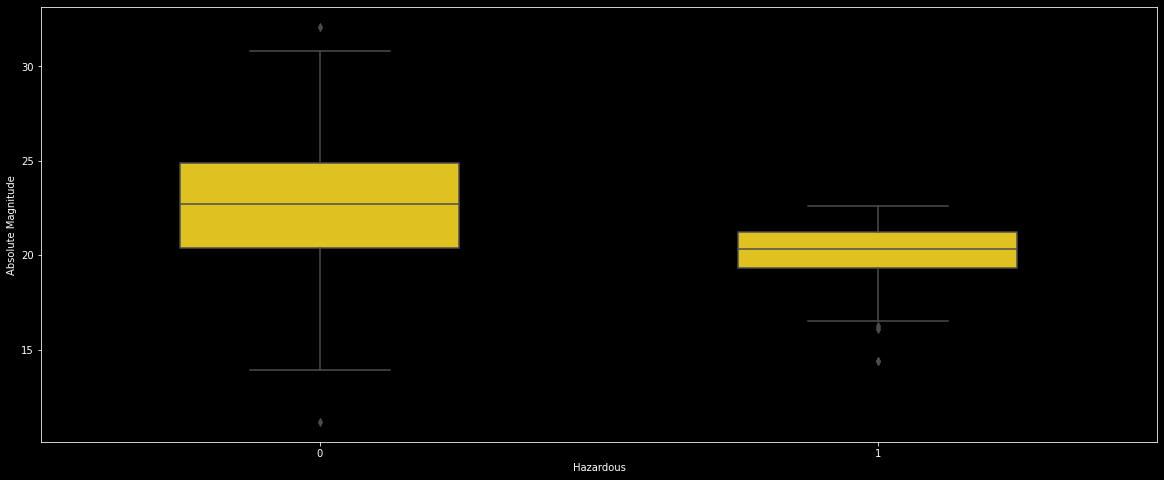

In [ ]:
sns.boxplot(df2['Hazardous'],df2['Absolute Magnitude'],color='Gold',width=0.5)

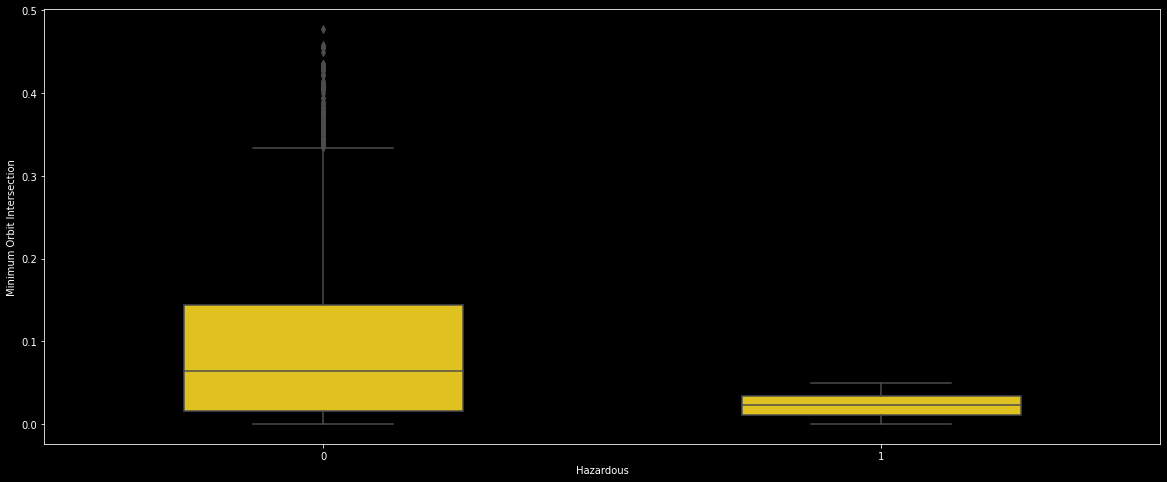

In [ ]:
sns.boxplot(df2['Hazardous'],df2['Minimum Orbit Intersection'],color='Gold',width=0.5)

Min-Max scaling to draw insights about distribution and to calculate Gini index

---



In [ ]:
# Min-Max Scaling

df3 = df2.iloc[:, 0:21]
#print ("\nOriginal data values : \n",  df3)


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

# Scaled feature
df3_after_min_max_scaler = min_max_scaler.fit_transform(df3)

print ("\nAfter min max Scaling : \n", df3_after_min_max_scaler)



After min max Scaling : 
 [[0.49856734 0.00810149 0.00810149 ... 0.7358251  0.25823873 1.        ]
 [0.48424069 0.00931136 0.00931136 ... 0.48271958 0.38871266 0.        ]
 [0.4364852  0.01479545 0.01479545 ... 0.81377721 0.24227093 1.        ]
 ...
 [0.55109838 0.00485585 0.00485585 ... 0.56540591 0.22297844 0.        ]
 [0.50811843 0.00738294 0.00738294 ... 0.56547209 0.23428006 0.        ]
 [0.3796084  0.0256526  0.0256526  ... 0.51350273 0.23784536 0.        ]]


In [ ]:
df3_scaled = pd.DataFrame(df3_after_min_max_scaler, columns=['Absolute Magnitude','Est Dia in KM(min)','Est Dia in KM(max)','Relative Velocity km per hr','Miss Dist.(kilometers)','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period','Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion','Hazardous'])

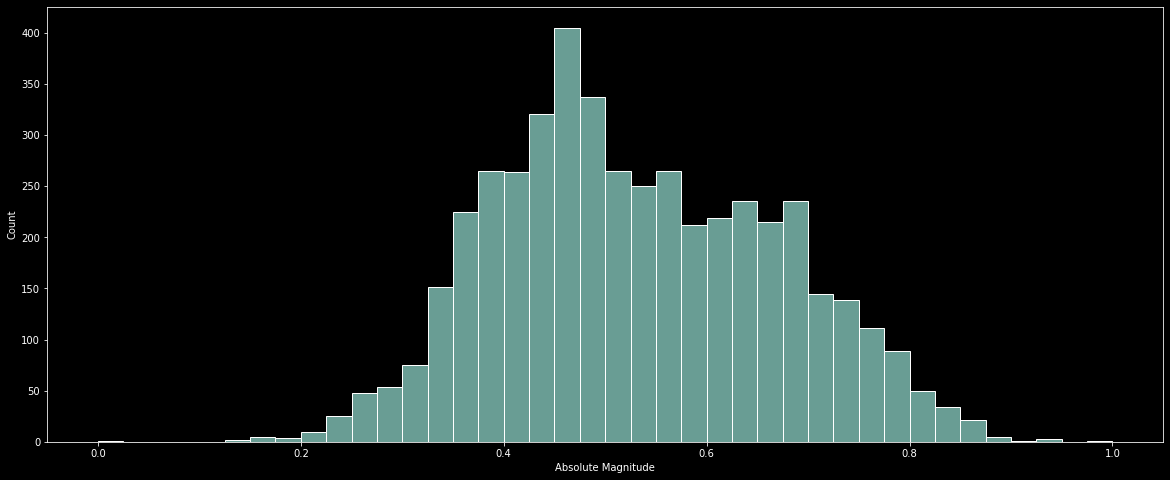

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
sns.histplot(df3_scaled['Absolute Magnitude'])
plt.show()

Here data is normally distributed (not skewed), hence using standard deviation to remove outliers.

Removing Outliers

---



In [ ]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

In [ ]:
def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_std(dataframe, cols, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(df3, df3.columns,replace=False)


Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ===========================  =============  =============
Outlier (Previously)    Outliers      Count  Column                         Lower Limit    Upper Limit
======================  ==========  =======  ===========================  =============  =============
True                    True              2  Absolute Magnitude                 13.5949        30.9408
True                    True             58  Est Dia in KM(min)               -0.904116        1.31332
True                    True             58  Est Dia in KM(max)                -2.02166        2.93668
True                    True             49  Relative Velocity km per hr       -28471.9         129062
False                   False                Miss Dist.(kilometers)        -2.70198e+07    1.03847e+08
False                   False                Orbit Uncertainity                -5.71796        12.7519
True                    True

In [ ]:
df3

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,22017.003799,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,65210.346095,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,27326.560182,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,40225.948191,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,35426.991794,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,79755.354273,6.187511e+06,8,0.019777,5.156,2457637.5,0.361512,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,11610.539577,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,25889.910626,9.126775e+06,6,0.059972,4.410,2458000.5,0.368055,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,40867.522309,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


Gini Index

---





In [ ]:
arr_mag = np.array(df3_after_min_max_scaler[:,0])
arr_mag

array([0.49856734, 0.48424069, 0.4364852 , ..., 0.55109838, 0.50811843,
       0.3796084 ])

Gini index evaluation is done on Absolute magnitude feature

In [ ]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [ ]:
gini(arr_mag)

0.14830185716628544

The purity of classification is satisfactory according the Gini score.



---



Model Training

In [ ]:
#Train-Test Split
x = df3.drop(['Hazardous'], axis = 1)
y = df3['Hazardous'].astype(int)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=100)

Feature Importance Plot

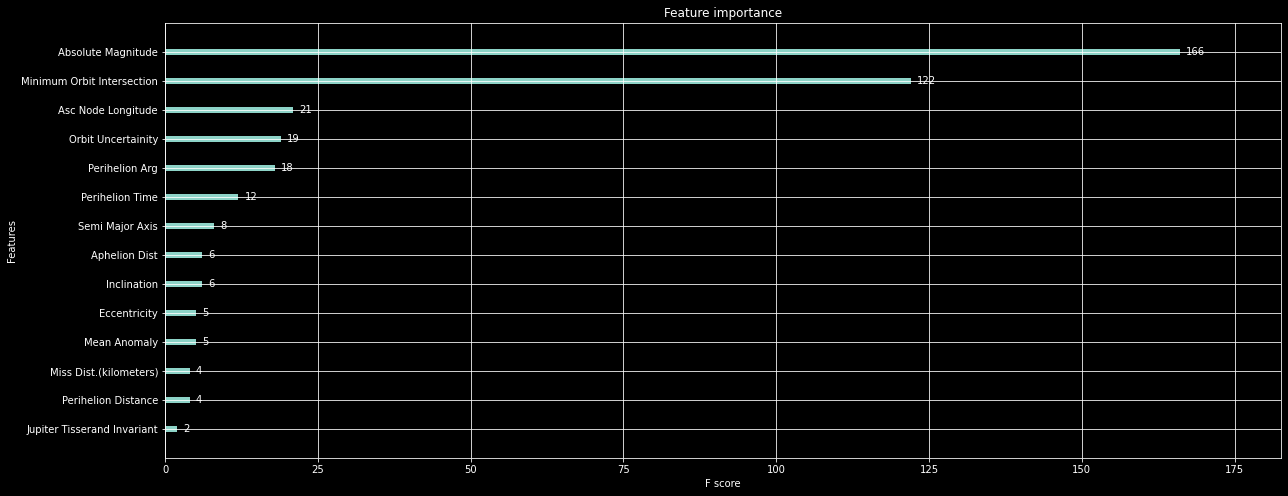

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)
plot_importance(xbg_model)
pyplot.show()

Hyperparameter Plots

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9960333932936671

Max_Depth

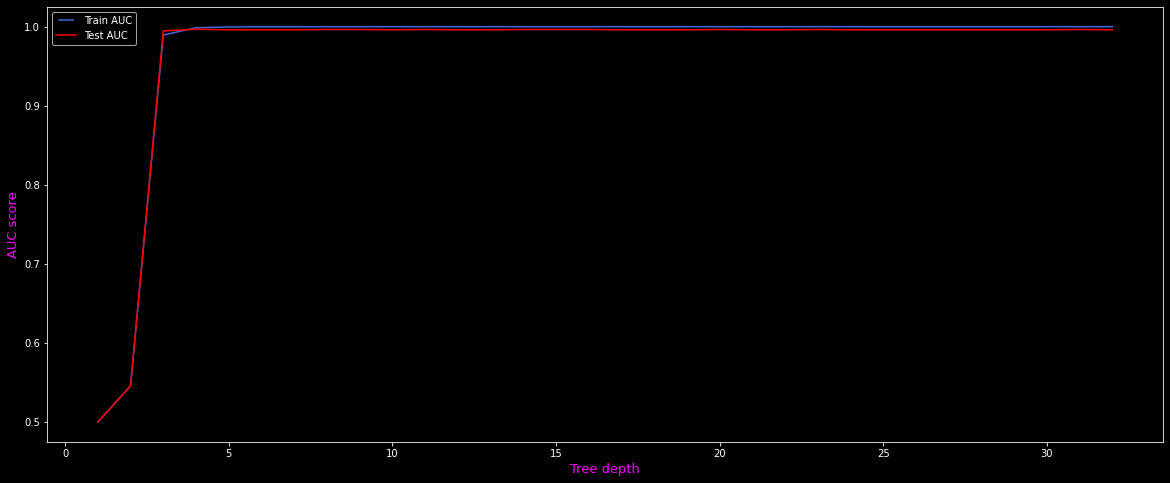

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color = 'royalblue', label= 'Train AUC' )
line2, = plt.plot(max_depths, test_results,  color = 'red', label= 'Test AUC')
plt.xlabel("Tree depth", color = 'magenta', fontsize = 13)
plt.ylabel("AUC score", color = 'magenta', fontsize = 13)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.show()

N-Estimators

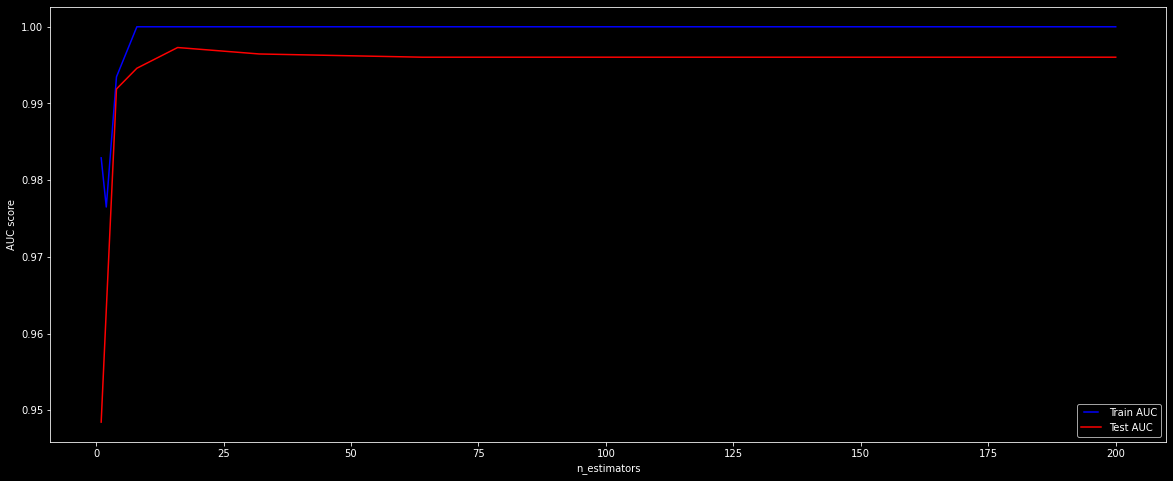

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We can see that for our data, we can stop at 32 trees as increasing the number of trees decreases the test performance.

min_samples_split

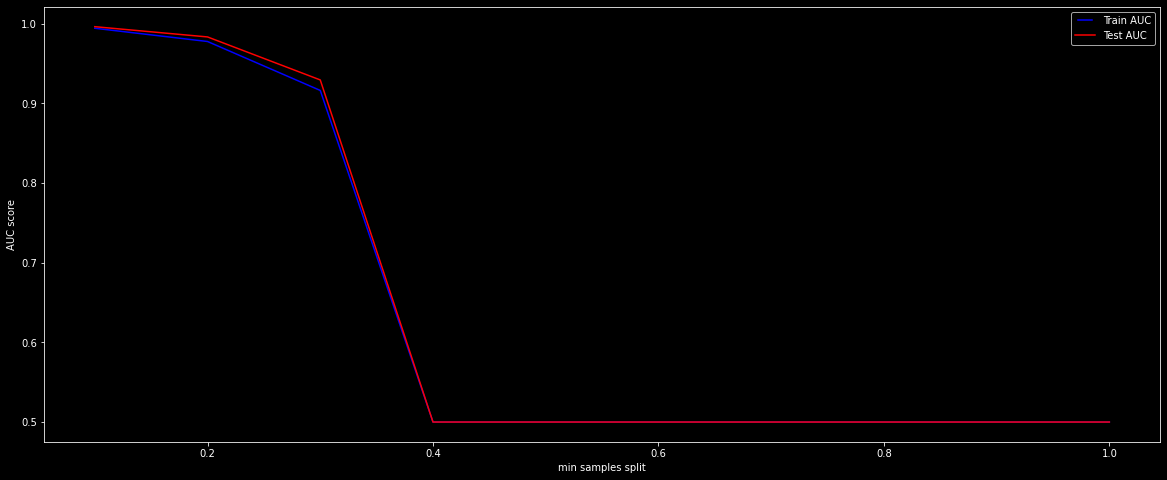

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

max_features

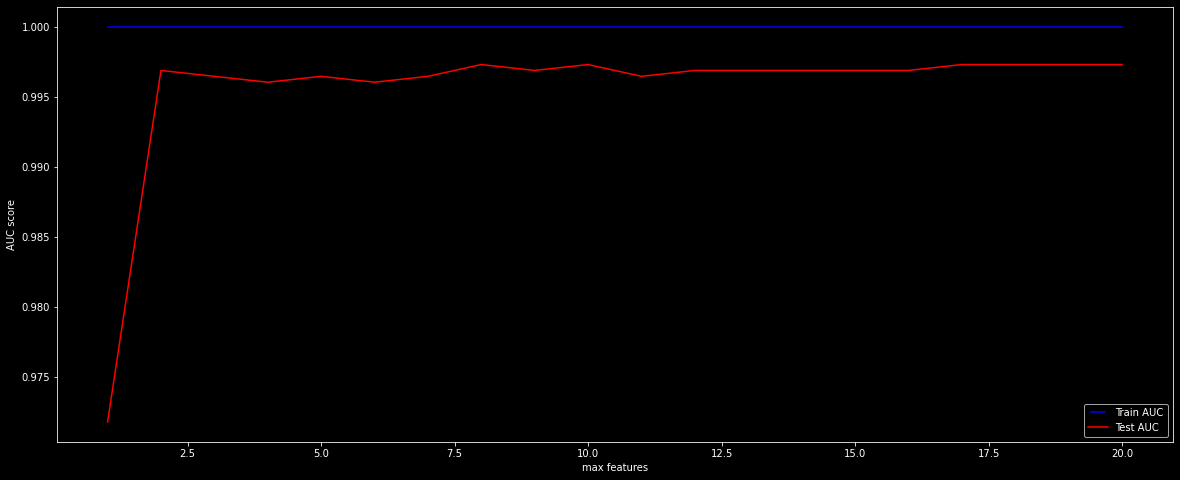

In [ ]:
max_features = list((range(1,df3.shape[1])))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Random Forest Algorithm

In [ ]:
model_1 = RandomForestClassifier()
model_1.fit(x_train, y_train)

y_pred = model_1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {round(accuracy,2)}')

Accuracy: 99.64


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.98      1.00      0.99       219

    accuracy                           1.00      1407
   macro avg       0.99      1.00      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [ ]:
print('The accuracy score corresponding to using random-forest to classify if asteroids are potentially hazardous is',accuracy_score(y_test,y_pred))
print('The precision score corresponding to using random-forest to classify if asteroids are potentially hazardous is',precision_score(y_test,y_pred))
print('The recall score corresponding to using random-forest to classify if asteroids are potentially hazardous is',recall_score(y_test,y_pred))
print('The F1 score corresponding to using random-forest to classify if asteroids are potentially hazardous is',f1_score(y_test,y_pred))

The accuracy score corresponding to using random-forest to classify if asteroids are potentially hazardous is 0.9964463397299218
The precision score corresponding to using random-forest to classify if asteroids are potentially hazardous is 0.9819819819819819
The recall score corresponding to using random-forest to classify if asteroids are potentially hazardous is 0.9954337899543378
The F1 score corresponding to using random-forest to classify if asteroids are potentially hazardous is 0.9886621315192743


XGBoost Algorithm

In [ ]:

xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)
predictions = xbg_model.predict(x_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc*100, 2))+'%')


99.64%


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.98      1.00      0.99       219

    accuracy                           1.00      1407
   macro avg       0.99      1.00      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [ ]:
print('The accuracy score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is',accuracy_score(y_test,predictions))
print('The precision score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is',precision_score(y_test,predictions))
print('The recall score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is',recall_score(y_test,predictions))
print('The F1 score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is',f1_score(y_test,predictions))

The accuracy score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is 0.9964463397299218
The precision score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is 0.9819819819819819
The recall score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is 0.9954337899543378
The F1 score corresponding to using XGBoost classifier to classify if asteroids are potentially hazardous is 0.9886621315192743


Random Forest Algorithm with Hyperparameter tuning

In [ ]:
model_1 = RandomForestClassifier(n_estimators=16,max_depth=max_depth, n_jobs=-1)
model_1.fit(x_train, y_train)

y_pred = model_1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {round(accuracy,2)}')

Accuracy: 99.86


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00       219

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



In [ ]:
print('The accuracy score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is',accuracy_score(y_test,y_pred))
print('The precision score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is',precision_score(y_test,y_pred))
print('The recall score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is',recall_score(y_test,y_pred))
print('The F1 score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is',f1_score(y_test,y_pred))

The accuracy score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is 0.9985785358919688
The precision score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is 0.9954337899543378
The recall score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is 0.9954337899543378
The F1 score corresponding to using random-forest after hyperparameter tuning to classify if asteroids are potentially hazardous is 0.9954337899543378
